# ABSTRACT: Desarrollo de un Sistema Automatizado Explicable para Estimar los Gastos Médicos Anuales de Clientes de Seguros de Salud

CODER Insurance Inc. es un proveedor líder de seguros de salud asequibles en América Latina. Como científico de datos principal en CODER, la tarea es desarrollar un sistema automatizado para estimar los gastos médicos anuales de nuevos clientes, que se utilizarán para determinar la tarifa anual del seguro. Se programará con el lenguaje de Phyton, El conjunto de datos utilizado para entrenar el modelo contiene varias características de los clientes, como la edad, el sexo, el IMC, numero de hijos, si tienen el hábito del tabaquismo y la región de residencia.

Un requisito clave del sistema es garantizar la explicabilidad, ya que los requisitos regulatorios exigen que las predicciones generadas por el sistema sean interpretables y justificables. Esto plantea un desafío en el desarrollo de un modelo que no solo proporcione estimaciones precisas, sino que también ofrezca información sobre las razones detrás de las predicciones.

Para abordar este desafío, se empleará un enfoque multifacético. El sistema utilizará algoritmos avanzados de aprendizaje supervizado como árboles de decisión o regresión lineal para generar predicciones. Se utilizarán técnicas de análisis exploratorio de datos, selección de características y gráficos de dependencia para interpretar el impacto de los diferentes factores del cliente en el gasto médico predicho. Además, se emplearán técnicas de inteligencia artificial para crear modelos comprensibles por humanos que puedan proporcionar explicaciones claras para las predicciones del sistema.

El sistema automatizado desarrollado proporcionará a CODER Insurance Inc; una herramienta eficiente y transparente para estimar los gastos médicos anuales de nuevos clientes, al tiempo que cumple con los requisitos regulatorios de explicabilidad. Esto ayudará a la compañía. a tomar decisiones informadas sobre las tarifas de seguros anuales ofrecidas a los clientes, lo que resultará en una mayor satisfacción del cliente y un mejor rendimiento del negocio.


# Objetivo del proyecto.


Por medio de un análisis exploratorio de los datos, encontrar las características que se relacionen con el cargo de la tarifa anual de los clientes, realizar un análisis multivariado y buscar correlaciónes entre las características, para crear un modelo de estimación de cargos automatizado,este modelo se entrenará para predecir la tarifa anual de nuevos clientes. 
La primera fase consistirá en una revisión de la salud de los datos, es decir, que no se encuentren dañados, o corrompidos, y si necesitan ser tratados o imputados, esto se coordinará con los ingenieros de datos.
Posteriormente empezará el análisis exploratorio donde por medio de distintos gráficos, analizaremos todas las características de los datos, para conocer como se comportan entre ellas, y como se relaciónan con el cargo estimado del cliente. Una vez que tengamos las características que nos ayudarán a crear un modelo óptimo, se adaptará un modelo de predicción adecuado para hacer el estimador, Una vez creado, este modelo se evaluará, usando los datos disponibles, por último, se etrenará con datos de prueba, para comprobar su rendimiento.
Este trabajo está dirigido al área de IT de la aseguradora, para que implementen el software en lás areas que necesiten hacer estimaciónes de cargos.


# Preguntas principales.

- ¿La edad de los clientes influye directamente en los cargos anuales de su seguro médico?

- ¿Los clientes con el hábito de fumar pagan tarifas más altas?

- ¿De cuanto el el cargo anual promedio de los clientes?

- ¿Que tan alejados están los cargos más altos del promedio?




# Librerías usadas en este proyecto.

In [55]:
#----------------  General Data Science / Math Libraries -------------------
import pandas as pd
import numpy as np
import scipy.stats as stats

#---------------- Machine Learning Libraries ------------------------
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#----------------  Visualization Libraries  -------------------------
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#----------------  Other Libraries  ----------------------------------
import warnings
warnings.filterwarnings('ignore')

**A continuación, se configurará la aparencia de los gráficos programados con la librería Matplot, 
esto con fines estéticos.**

In [56]:
sns.set_style("darkgrid")
sns.color_palette("Set2")

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

# Carga de datos.

**El conjunto de datos proporcionado es un archivo CSV que contiene historiales médicos verificados, que contienen la información mencionada anteriormente y los cargos médicos reales de más de 1300 clientes.**

In [57]:
url = "https://raw.githubusercontent.com/CesarAugusto96/ProyectoDS_CesarCaballero/main/insurance.csv"

In [58]:
Insurance_data = pd.read_csv(url)

In [59]:
# Vistazo parcial del data frame

Insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.9
1,18,male,33.8,1,no,southeast,1725.6
2,28,male,33.0,3,no,southeast,4449.5
3,33,male,22.7,0,no,northwest,21984.5
4,32,male,28.9,0,no,northwest,3866.9


# Descripción de los datos

- age: Edad del cliente.
- sex: Sexo del cliente.
- bmi: Índice de Masa Corporal.
- children: Número de hijos.
- smoker: indica si el cliente es fumador o no.
- region: regíon donde habita el cliente.
- charges: el cargo de la tarífa anual del seguro del cliente.

# Tratamiento de los datos.

In [60]:
#Información general de las columnas del data frame.

Insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


**La Data parece estar bastante limpia, no contiene datos Nulos y los tipos de datos son ideales para 
armar el modelo, contiene tanto datos continuos, como categóricos.**

# Análisis Exploratorio de los Datos

**Hechemos un vistazo general de los datos categóricos**

In [61]:
#Función que utilizaremos para graficar los datos categóricos.

def graficos_eda_categoricos(cat):
    
    from math import ceil
    filas = ceil(cat.shape[1] / 2)

    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (9, filas * 5))

    ax = ax.flat 

    for cada, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax = ax[cada], color = "pink")
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12)

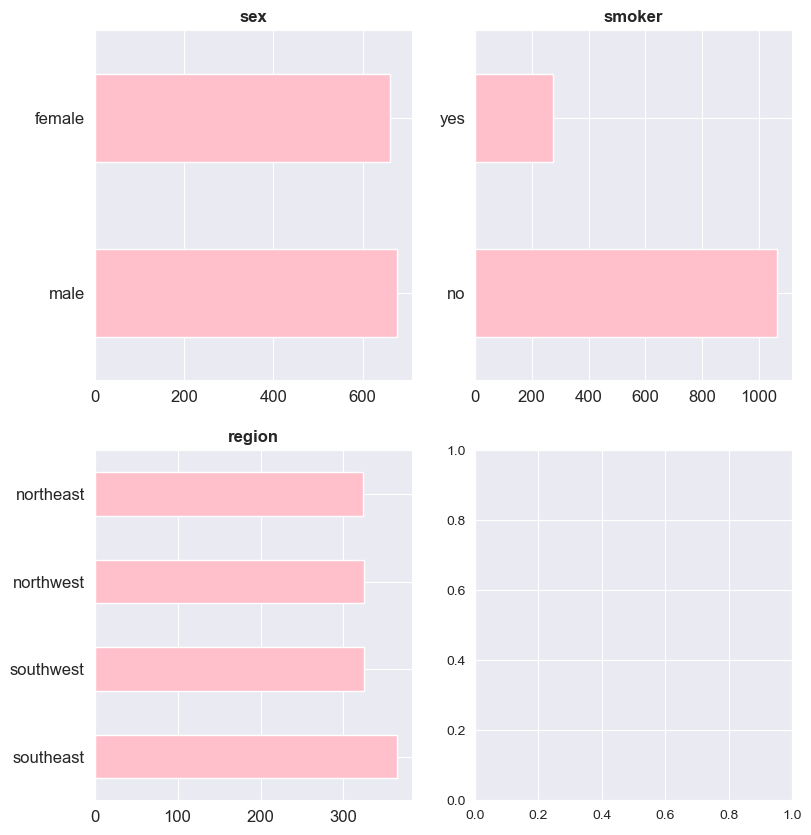

In [62]:
# Usemos la función creada para graficar.

graficos_eda_categoricos(Insurance_data.select_dtypes('O'))

**En lo que al sexo de los clientes se refiere, la diferencia entre los usuarios de sexo masculino y sexo femenino no es tan amplia, de hecho estan casi parejos, lo mismo se puede decir de la variable de "region", cuya diferencia más significativa con respecto a las demás características se encuentra en la región "southeast" (Sudeste).**

**El gráfico categórico que nos da un dato más interesante, es el de los clientes que tienen el hábito de fumar, en esete caso, podemos notar que son más los clientes que no fuman, sin embargo si hay una cantidad de clientes considerable que tienen el hábito de fumar, este hábito, segun la OMS, es de las principales causas de enfermedades pulmonares y muertes en ciertas regiones del mundo.**

# Exploración de datos continuos.

In [63]:
#Hagamos una función para conocer los datos estadísticos.

def estadisticos_cont(num):
  
    estadisticos = num.describe().T
   
    estadisticos['median'] = num.median()
   
    estadisticos = estadisticos.iloc[:,[0,1,8,2,3,4,5,6,7]]
 
    return(estadisticos)

In [64]:
pd.options.display.float_format = '{:.1f}'.format

In [65]:
estadisticos_cont(Insurance_data.select_dtypes('number'))

,count,mean,median,std,min,25%,50%,75%,max
age,1338.0,39.2,39.0,14.0,18.0,27.0,39.0,51.0,64.0
bmi,1338.0,30.7,30.4,6.1,16.0,26.3,30.4,34.7,53.1
children,1338.0,1.1,1.0,1.2,0.0,0.0,1.0,2.0,5.0
charges,1338.0,13270.4,9382.0,12110.0,1121.9,4740.3,9382.0,16639.9,63770.4


**Los rangos de los datos parecen no tener mucha variabilidad, los valores entre la media, la mediana y el Q2 estan bastante parejos, con excepción de los valores de la característica "charges" cuya media y mediana no coinciden.**

**Ya que tenemos el dato de los clientes que fuman o no fuman, podemos hacer una comparativa de los cargos para saber si se les está cobrando más a aquellos clientes que fumán y que podrían estar presentando más problemas de salud.**

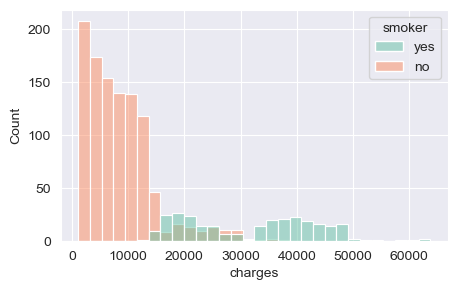

In [66]:
fig, ax = plt.subplots(figsize=(5, 3))

sns.histplot(data = Insurance_data, x = "charges" ,
                hue = "smoker",
                palette = "Set2")
plt.show()

**Este gráfico nos haclara que aquellos clientes que fuman, pagan tarífas mas altas debido a que tienen más riezgo de sufir enfermedades o como en muchos casos la muerte.**

**A continuación, utilizaremos diagramas de caja para verificar los valores atípicos.**

**Verifiquemos valores atipicos de las variables "Edad" e "Índice de Masa Corporal"**

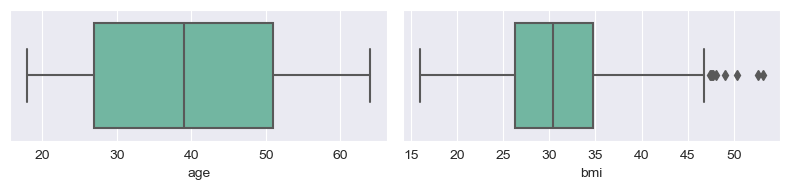

In [67]:
f, axs = plt.subplots(1, 2, 
                      figsize=(8, 2), 
                      gridspec_kw=dict(width_ratios=[5, 5]))

sns.boxplot(data = Insurance_data, 
                x = "age",
                palette = "Set2",
                ax=axs[0])

sns.boxplot(data = Insurance_data, 
             x = "bmi",
             palette = "Set2",
             ax=axs[1]); 
             
f.tight_layout()

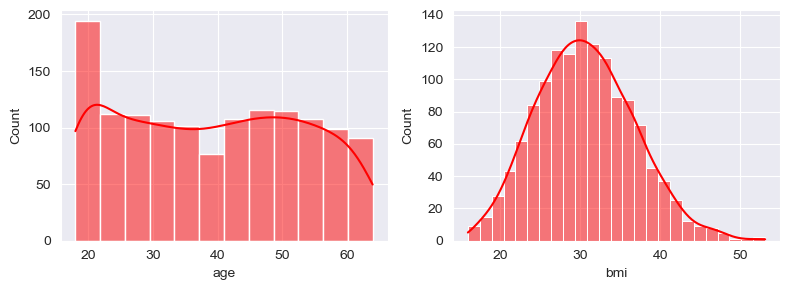

In [68]:
f, axs = plt.subplots(1, 2, 
                      figsize=(8, 3), 
                      gridspec_kw=dict(width_ratios=[5, 5]))

sns.histplot(data = Insurance_data, 
              x="age", 
              kde=True,
              color = "red",
              ax=axs[0])

sns.histplot(data = Insurance_data, 
             x = "bmi",
             kde=True,
             color = "red",
             ax=axs[1]); 
             
f.tight_layout()

**La distribución de la característica "age" es bastante uniforme, no hay presencia de datos atípicos, y aunque la diferencia entre la edad mínima y maxima es grande, parece tener un comportamiento adecuado con respecto a la mediana y la media.**

**Por su parte el "bmi" o Índice de Masa Corporal por sus siglas en español parece seguir una distribución normal Gaussiana con un valor central aproximado de "30", y aunque en el diagrama de caja, muestra la presencia de valores atípicos que tienden a la derecha, estos no parecen representar un sesgo real en la distribución.**

**El Índice de Masa Corporal promedio de los clientes indica que la mayoria se encuentra en la categoría de "sobre peso" como se puede ver en la imágen a continuación con datos basados en información de la OMS. 
Esto nos llevaría a pensar que el prómedio de los clientes podría sufrir enfermedades realcionadas con el sobre peso.**

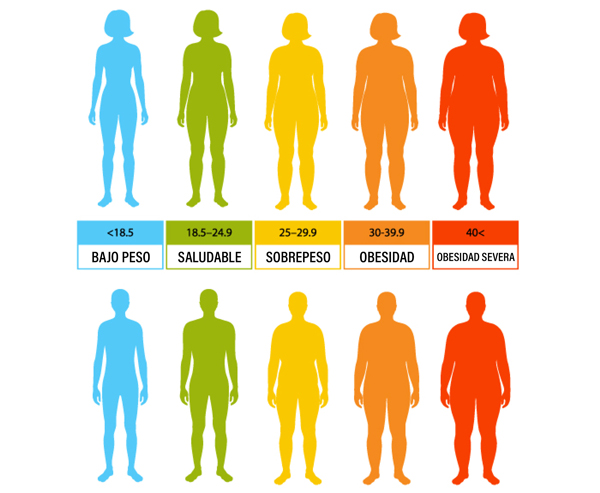

**Ahora verifiquemos los datos atípicos con los datos de "Número de hijos" y "Cargos"**

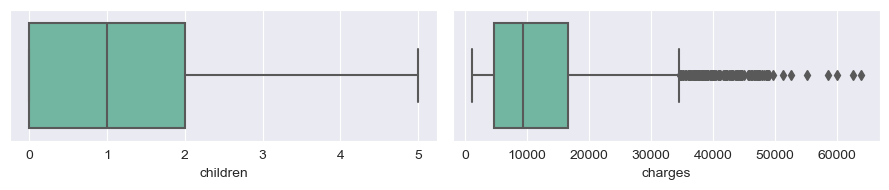

In [69]:
f, axs = plt.subplots(1, 2, 
                      figsize=(9, 2), 
                      gridspec_kw=dict(width_ratios=[5, 5]))

sns.boxplot(data = Insurance_data, 
                x = "children",
                palette = "Set2",
                ax=axs[0])

sns.boxplot(data = Insurance_data, 
             x = "charges",
             palette = "Set2",
             ax=axs[1]); 
             
f.tight_layout()

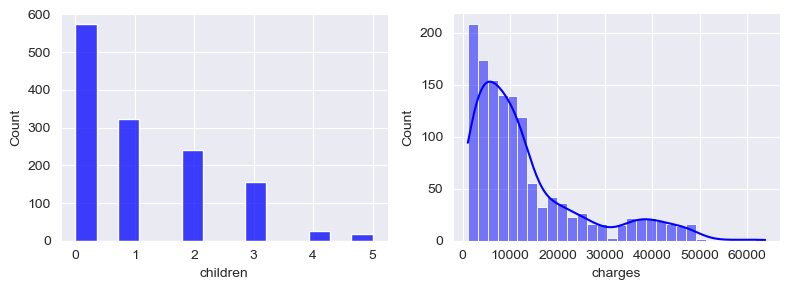

In [70]:
f, axs = plt.subplots(1, 2, 
                      figsize=(8, 3), 
                      gridspec_kw=dict(width_ratios=[5, 5]))

sns.histplot(data = Insurance_data, 
              x="children",
              color = "blue",
              ax=axs[0])

sns.histplot(data = Insurance_data, 
             x = "charges",
             kde=True,
             color = "blue",
             ax=axs[1]); 
             
f.tight_layout()

**Podemos notar que la mayoría de los clientes no tienen hijos, y en segundo lugar, están los clientes que tienen un único hijo,
esto tiene cierta lógica y nos podría decir que los clientes sin hijos quizá estén destinando sus ingresos a otros servicios,
como lo podría ser el seguro médico, en lugar de destinarlo a sus descendientes, pero por supuesto esto es solo una suposición.**

**Por otro lado, la variable "charges" que es la característica que queremos predecir para futuros clientes, parace tener una distribución más sesgada hacia la derecha, con los valores centrales distribuidos a la izquierda, y esto en cierta medida tambíen es lógico, ya que la mayoría de los clientes quizá hayan optado por tarifas más bajas ya que no necesiten un seguro médico más extendido, por otro lado la distribución sesgada a la derecha nos podría estar hablando de clientes que quizá por su trabajo o algúna actividad física que realize tienda a correr más riesgos o usar más los servicios médicos durante el año.**

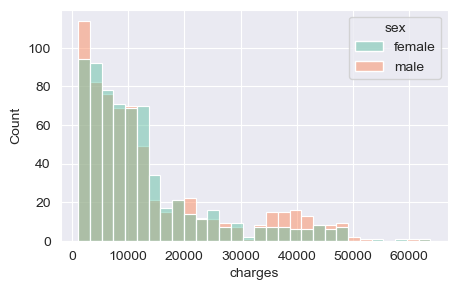

In [71]:
fig, ax = plt.subplots(figsize=(5, 3))

sns.histplot(data = Insurance_data, x = "charges" ,
                hue = "sex",
                palette = "Set2")
plt.show()

**En lo que respecta a las tarífas más altas ("charges"), los clientes del género masculino tienden a pagar más que el sexó femenino, si sabemos que los clientes fumadores se encuentran entre los que pagan tarifas más altas, podriamos decir que tal vez los hombres fuman más que las mujeres.**

**comparemoslo con un gráfico.**

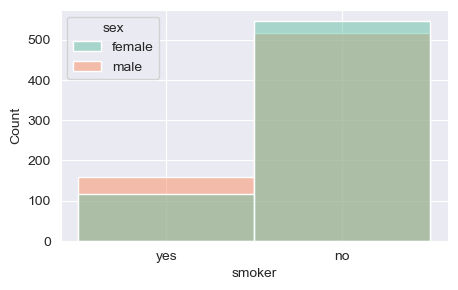

In [72]:
fig, ax = plt.subplots(figsize=(5, 3))

sns.histplot(data = Insurance_data, x = "smoker" ,
                hue = "sex",
                palette = "Set2")
plt.show()

**Este gráfico nos muestra la cantidad de los fumadores contra la de no fumadores, y podemos darnos cuenta que efectivamente la cantidad de clientes del género masculino, representan la mayoría entre los que tienen el hábito de fumar. Esto nos ayuda a explicar el porque más hombres pagan las tarífas altas.**

**Ahora veremos cual de los géneros es mayor a medida que incrementa la edad.**

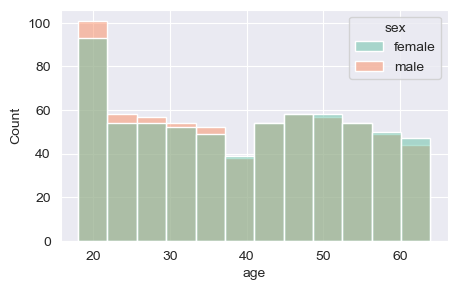

In [73]:
fig, ax = plt.subplots(figsize=(5, 3))

sns.histplot(data = Insurance_data, x = "age" ,
                hue = "sex",
                palette = "Set2")
plt.show()

**Se muestra como la tendencia es que a mayor edad, los clientes del género femenino representan una mayor población que los del género masculino, Sin embargo la diferencia es muy poca y los datos no pueden ser concluyentes.**

**Ahora hagamos comparativas de las variables mas relacionadas con la variable que queremos predecir (charges), utilizando la variable de fumadores o no fumadores para distinguirlos.**

**Veamos la relación entre la variable "Edad" y "Cargos", utilizando la variable de fumadores para diferenciarlos.**

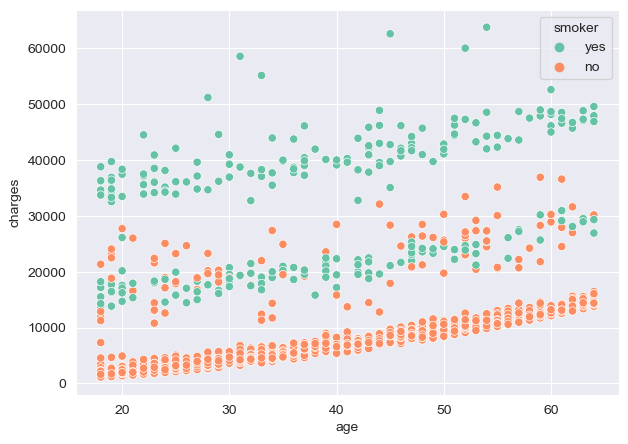

In [74]:
fig, ax = plt.subplots(figsize=(7, 5))

sns.scatterplot(data = Insurance_data, x = "age" ,
                y = "charges",
                hue = "smoker",
                palette = "Set2")
plt.show()

**Aqui vemos como hay una tendencia positiva entre la edad y los cargos, a medida que los clientes tienen mayor edad, se les hace cargos más altos, en el gráfico podemos notar 3 grupos, el primero de No fumadores, y cuyas tarífas son más bajas, aunque si tienen tendencia ascendente, el segundo grupo muestra una combinación y el tercero son solo clientes que fuman. Estos últimos pagan tarifas más altas.**

**Veamos un gráfico que nos muestre como se comporta el Indice de Masa Corporal respecto a los cargos, diferenciando a los clientes que fuman de los que no fuman.**

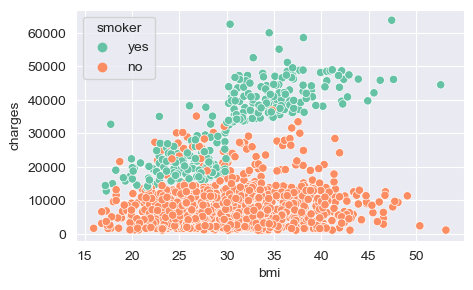

In [75]:
fig, ax = plt.subplots(figsize=(5, 3))

sns.scatterplot(data = Insurance_data, x = "bmi" ,
                y = "charges",
                hue = "smoker",
                palette = "Set2")
plt.show()

**Aqui podemos ver que los clientes que a los clientes que fuman, si se le hace un mayor cargo anual, acentuandose cuando pasan el 30 % de IMC, a diferencia de los clientes que no fuman, a estos últimos no se les hace cargos más altos a medida que aumenta su Índice de masa corporal.**

**Comparemos con la variable "Número de hijos"**

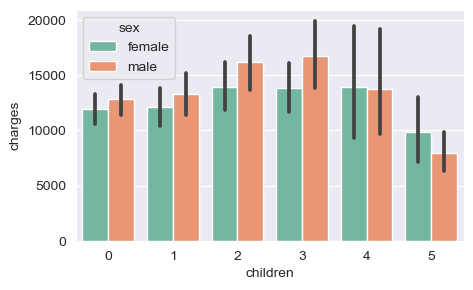

In [76]:
fig, ax = plt.subplots(figsize=(5, 3))

sns.barplot(data = Insurance_data, x = "children" ,
                y = "charges",
                hue = "sex",
                palette = "Set2")
plt.show()

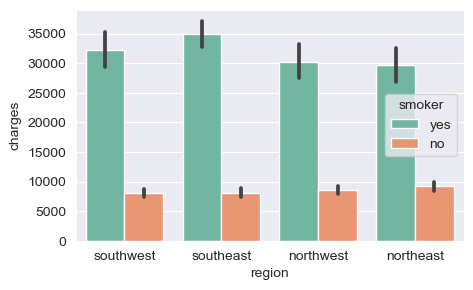

In [77]:
fig, ax = plt.subplots(figsize=(5, 3))

sns.barplot(data = Insurance_data, x = "region" ,
                y = "charges",
                hue = "smoker",
                palette = "Set2")
plt.show()

# Conclusiónes 

- Una de lás variables más importantes al momento de considerar los cargos, es el de los clientes que fuman, ya que despues de hacer la comparativa con las otras variables, podemos notar que aquellos que tienen el hábito de fumar, tienden a pagar tarifas más altas, y se acentúan cuando se comparan con el IMC o la Edad.

- Las características que muestran una mayor relación con la variable que queremos predecir son la de "Edad" y "BMI". aunque por si solas no pueden determinar los cargos totales, podemos verificar el coeficiente de correlación de las variables más importantes (Edad, BMI, Smoker) para un resultado más determinante.

# Selección de Característica.

**Hagamos una gráfica de correlación para saber como se correlacionan las variables continuas respecto a la variable que queremos predecir, en este caso, la variable "charges"**

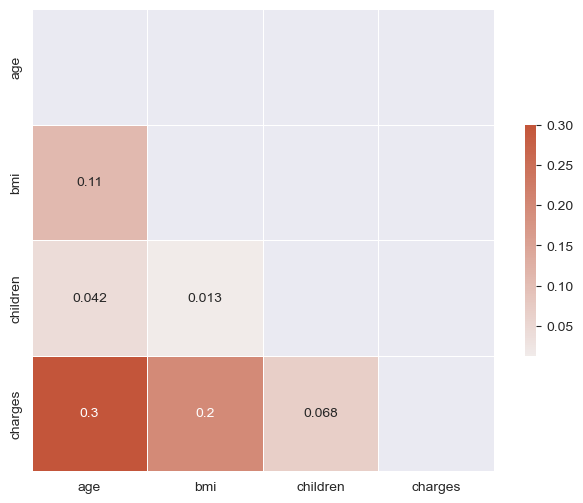

In [78]:
corr = Insurance_data.corr()

mask = np.triu(np.ones_like(corr,dtype = bool))

fig, ax = plt.subplots(figsize=(8, 6))

cmap = sns.diverging_palette(230, 20, as_cmap = True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,center=0,annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

**El mapa de correlación nos muestra las variables óptima para el modelo, la cual es la variable "age", la correlación es fuerte sin llegar a ser muy alta (0.30), esto implica que no exista una correlación negativa. 
Las otras variables que podemos usar para nuestro modelo son: bmi y children.**

# Creando el modelo de predición

**Para crear este estimador de cargos, utilizarémos el modelos de Regresión Lineal.**

**Utilizando la fórmula de la pendiente (y = wx + b)**

**Creemos una función para ver como se ajusta la pendiente en nuestro gráfico de "charges" contra "age"**

In [79]:
#Función que nos permite cambiar los valores de la pendiente de la recta.

def try_parameters(w, b):
    ages = Insurance_data.age
    target = Insurance_data.charges

#Función que nos permite graficar la recta.

    def estimate_charges(age, w, b):
        return w * age + b
    estimated_charges = estimate_charges(ages, w, b)
    
    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

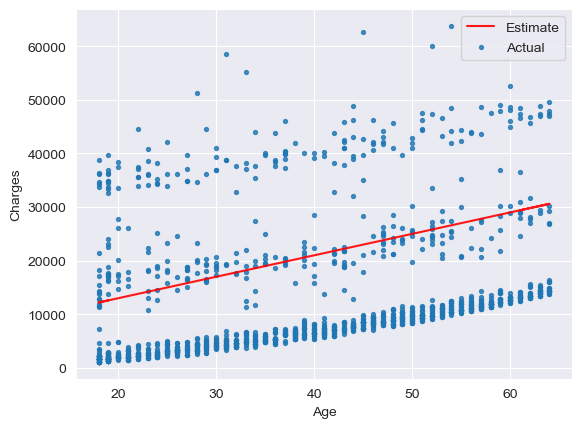

In [80]:
try_parameters(400, 5000)

**Despúes de estimar la recta con parametros dados manualmente, programemos una función que nos permita
automatizar la estimación de la recta nuevos valores, sin tener que hacerlo manual, este será nuestro modelo.**

# Creando nuestro modelo de regresión

In [81]:
#Inicializemos el modelo.

model= LinearRegression()

**A continuación,usaremos el método fit() para encontrar la mejor línea de ajuste para las entradas y los objetivos.**

**Debido a que el método fit() requiere un array de 2 dimenciónes, debemos crear este array, en lugar de solo usar la columna "charges"**

In [82]:
inputs = Insurance_data[['age']]

targets = Insurance_data.charges

print(inputs.shape,target.shape)

(1338, 1) (1338,)


**Entrenemos nuestro modelo con el método fit()**

In [83]:
model.fit(inputs, targets)

LinearRegression()

**Hagamos una prueba de nuestro modelo ingresando algunos valores manuales de "Edad"**

In [84]:
model.predict(np.array([[25], 
                        [47], 
                        [62]]))

array([ 9608.95047274, 15278.84808341, 19144.68736341])

**Comparemos las predicciones con el gráfico de Edad vs Cargos, lo haremos tomando el cuenta el primero grupo, que corresponde a los no fumadores, ya que este dato no se está tomando en cuenta en la estimación.**

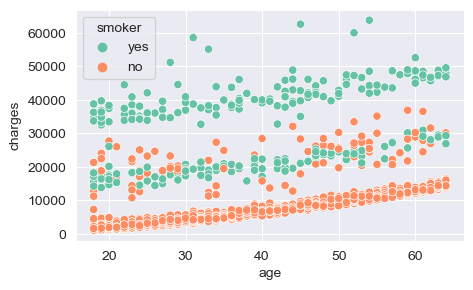

In [85]:
fig, ax = plt.subplots(figsize=(5, 3))

sns.scatterplot(data = Insurance_data, x = "age" ,
                y = "charges",
                hue = "smoker",
                palette = "Set2")
plt.show()

Aunque no es exacto, el modelo predice con una buena estimación para los datos introducidos manualmente (25,46,62)

**Ahora usemos nuestros datos ogirinales de la variable edad, para ver como predice los cargos nuestro modelo.**

In [86]:
predictions = model.predict(inputs)

In [87]:
predictions

array([ 8062.61476073,  7804.89214207, 10382.11832874, ...,
        7804.89214207,  8578.05999807, 18886.96474474])

# Evaluación del modelo.

**Para evaluar este modelo utilizaremos el Error Cuadrático medio**

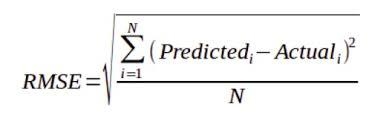

**Veamos la representación visual.**

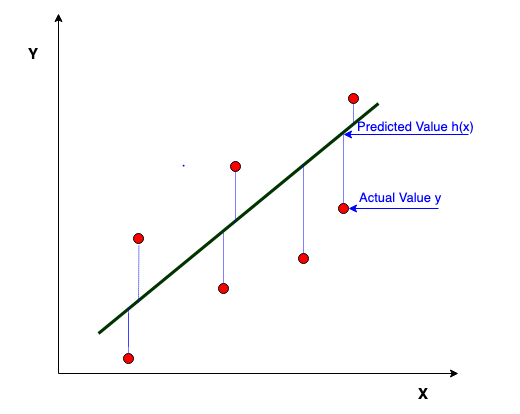

**Utilizando la librería Pandas, podemos crear fácilmente una función que nos calcule este ECM**

In [88]:
def rmse(targets, predictions):
    
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [89]:
#Apliquemos la función del ECM para estimar cual es la pérdida promedio de nuestra predicción.

loss = rmse(targets, predictions)

rmse(targets, predictions)

print("Pérdida:",'$',loss)

Pérdida: $ 11551.665620756306


**La pérdida promedio es de $11551 USD; aunque esto no parece ser tanto, si implica una pérdida significativa.**

**Un factor por el que podría estar fallando nuestro modelo es porque solo estamos coniderando la variable "age" para la estimación. A continuación, haremos más estimaciónes usando las otras variables con coeficiente de correlación.**

In [90]:
#Hagamos la predicción de los cargos, pero ahora usando la variable, age, bmi y children.

inputs, targets = Insurance_data[['age', 'bmi','children']], Insurance_data['charges']

model = LinearRegression().fit(inputs, targets)

predictions = model.predict(inputs)

loss = rmse(targets, predictions)
print('Pérdida:','$', loss)

Pérdida: $ 11355.31790112597


**Al incluir estas variables (bmi,children) en la estimación, la pérdida es menor ($11355), sin embargo no lo es tanto como para ser algo representativo.**

**Incluyamos la variable "smoker" que también tiene una gran correlación con los cargos.**

**Como esta variable es de tipo categórica, debemos convertirla a una variable numérica.**

In [91]:
#Convertir los valores Yes & No en variables numéricas.

smoker_codes = {'no': 0, 'yes': 1}

#Creando una nueva columna con los valores numéricos de la columna smoker
Insurance_data['smoker_code'] = Insurance_data.smoker.map(smoker_codes)

In [92]:
#Verifiquemos el coeficiente de correlación de la columna smoker.

Insurance_data.charges.corr(Insurance_data.smoker_code)

0.7872514304984772

**Usemos esta variable para hacer la estimación con nuestro modelo.**

In [93]:
#Agreguemos la varialbe "Smoker" numérica que creamos, en el modelo creado con anterioridad.

inputs, targets = Insurance_data[['age', 'bmi','children','smoker_code']], Insurance_data['charges']

model = LinearRegression().fit(inputs, targets)

predictions = model.predict(inputs)

loss = rmse(targets, predictions)
print('Pérdida:','$',loss)

Pérdida: $ 6056.439217188078


**Ahora, si, la estimación se redujo considerablemente, pasó de 11355 USD a una pérdida media de 6056 USD.**

**Repitamos el mismo proceso con la caracteristica "sex".**

In [94]:
#Convertir los valores Yes & No en variables numéricas.

sex_codes = {'no': 0, 'yes': 1}

#Creando una nueva columna con los valores numéricos de la columna smoker
Insurance_data['sex_code'] = Insurance_data.smoker.map(sex_codes)

In [95]:
#Verifiquemos el coeficiente de correlación de la columna sex.

Insurance_data.charges.corr(Insurance_data.sex_code)

0.7872514304984772

**Incluyamos la variable "sex" en el modelo y veamos su rendimiento.**

In [96]:
#Agreguemos la varialbe "Sex" numérica que creamos, en el modelo creado con anterioridad.

inputs, targets = Insurance_data[['age', 'bmi','children','smoker_code','sex_code']], Insurance_data['charges']

model = LinearRegression().fit(inputs, targets)

predictions = model.predict(inputs)

loss = rmse(targets, predictions)
print('Pérdida:','$',loss)

Pérdida: $ 6056.439217188077


**El sexo no parece ser una variable que nos ayude a mejorar la presición del modelo, por eso será descartada.**

In [97]:
#Quitemos la varialbe "Sex" numérica que creamos, en el modelo creado con anterioridad.

inputs, targets = Insurance_data[['age', 'bmi','children','smoker_code']], Insurance_data['charges']

model = LinearRegression().fit(inputs, targets)

predictions = model.predict(inputs)

loss = rmse(targets, predictions)
print('Pérdida:','$',loss)

Pérdida: $ 6056.439217188078


**Eliminemos datos atípicos de las variables, charges y bmi, para ver si mejora la presición del modelo.**

In [98]:
#Eliminando datos atipicos con el método interquantil-

Q1 = Insurance_data["charges"].quantile(0.25)
Q3 = Insurance_data["charges"].quantile(0.75)
IQR = Q3 - Q1

# aplicando la fórmula y almacenandola en un nuevo df
clean_data = Insurance_data[(Insurance_data["charges"] >= Q1 - 1.5 * IQR) & (Insurance_data["charges"] <= Q3 + 1.5 * IQR)]

In [99]:
#Apliquemos un filtro con los valores z y pongamoslo en una nueva varible.
clean_data

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code
0,19,female,27.9,0,yes,southwest,16884.9,1,1
1,18,male,33.8,1,no,southeast,1725.6,0,0
2,28,male,33.0,3,no,southeast,4449.5,0,0
3,33,male,22.7,0,no,northwest,21984.5,0,0
4,32,male,28.9,0,no,northwest,3866.9,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.5,0,0
1334,18,female,31.9,0,no,northeast,2206.0,0,0
1335,18,female,36.9,0,no,southeast,1629.8,0,0
1336,21,female,25.8,0,no,southwest,2007.9,0,0


**Se eliminaron 139 filas de datos**

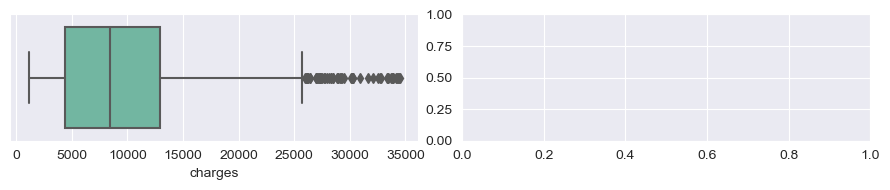

In [100]:
#Comprobemos como queda las variable  sin los datos atípicos con un diagrama de caja.
f, axs = plt.subplots(1, 2, 
                      figsize=(9, 2), 
                      gridspec_kw=dict(width_ratios=[5, 5]))

sns.boxplot(data = clean_data, 
                x = "charges",
                palette = "Set2",
                ax=axs[0])

f.tight_layout()

**Hagamos una estimación con nuestro modelo usando este nuevo dataframe sin los valores atípicos.**

In [101]:
#Quitemos la varialbe "Sex" numérica que creamos, en el modelo creado con anterioridad.

inputs, targets = clean_data[['age', 'bmi','children','smoker_code']], clean_data['charges']

model = LinearRegression().fit(inputs, targets)

predictions = model.predict(inputs)

loss = rmse(targets, predictions)
print('Pérdida:','$',loss)

Pérdida: $ 4585.554764787871


**La pérdida bajó de 6056 USD a 4585 USD, eso significa que hubo una mejora en la presición.**

# Entrenamiento del Modelo.


**Entranaremos el modelo con set de datos de prueba para ver como predice datos nuevos desconocidos.**

In [102]:
#Usamos los datos para dividirlos en datos de modelado y datos de entrenamiento.

inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, targets, test_size=0.25)

In [103]:
# Generar la estimación
predictions_train = model.predict(inputs_train)

# Evaluar la pérdida del modelo de entrenamiento para verificar su presición
loss = rmse(targets_train, predictions_train)
print('Pérdidas del Entrenamiento:','$',loss)

Pérdidas del Entrenamiento: $ 4695.176720611033


# Conclusiones

**Con los datos nuevos que el modelo no conocía, nuestro modelo hizo una estimación muy parecida a la que hizo sin los datos de entrenamiento. esto quiere decir que el modelo está bien entrenado para estimar las tarifas de los nuevos clientes.**

**A pesar de que se ocuparón la mayoría de las variables para crear el modelo y además se quitaron los datos atípicos, la estimación sigue teniendo una pérdida considerable, esto se deba quizá a que la cantidad de datos de la muestra no es suficiente. 
A esto se le llama Underfitting y es un problema con la cantidad de la muestra, que no nos permite entrenar bien nuestro modelo.**

**Posiblemente habría que crear un nuevo modelo con otro método que se adecue a nuestros datos.**